<a href="https://colab.research.google.com/github/andrewhuangx/HHA507-Anovas/blob/main/Andrew_Anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Packages

In [91]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew, bartlett
import statsmodels.stats.multicomp as mc
import numpy as np

Import dataset

In [17]:
stroke = pd.read_csv('https://raw.githubusercontent.com/andrewhuangx/HHA507-Anovas/main/healthcare-dataset-stroke-data.csv')

Identify Variables

In [18]:
list(stroke)

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

IV: Gender, Work Type, Smoking Status
DV: BMI

# Pre-Assumption Testing

## Boxplot Outliers

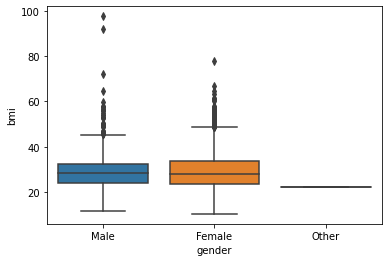

In [39]:
stroke_bmi_gender = sns.boxplot(x='gender', y= 'bmi', data=stroke)

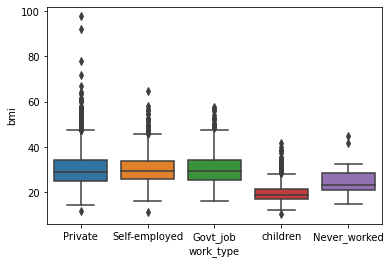

In [30]:
stroke_bmi_worktype = sns.boxplot(x='work_type', y= 'bmi', data=stroke) 

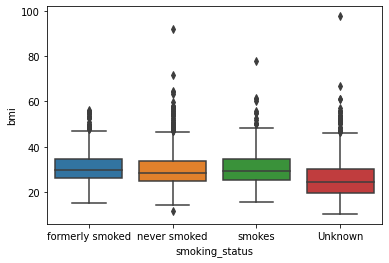

In [31]:
stroke_bmi_smoking = sns.boxplot(x='smoking_status', y= 'bmi', data=stroke) 

## Histogram Distribution

In [54]:
gender1 = stroke[stroke['gender'] == 'Male']
gender2 = stroke[stroke['gender'] == 'Female']
gender3 = stroke[stroke['gender'] == 'Other']

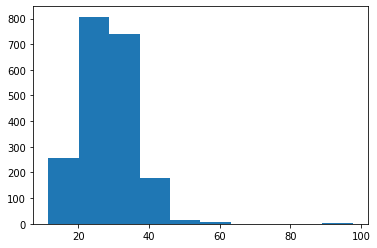

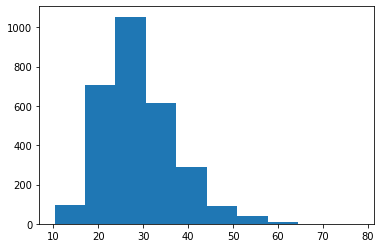

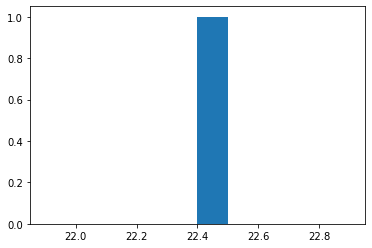

In [61]:
plt.hist(gender1['bmi'])
plt.show()

plt.hist(gender2['bmi'])
plt.show()

plt.hist(gender3['bmi'])
plt.show()

In [59]:
work1 = stroke[stroke['work_type'] == 'Private']
work2 = stroke[stroke['work_type'] == 'Self-employed']
work3 = stroke[stroke['work_type'] == 'Govt_job']
work4 = stroke[stroke['work_type'] == 'children']
work5 = stroke[stroke['work_type'] == 'Never_worked']

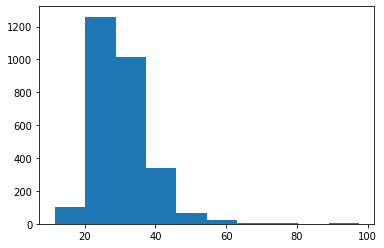

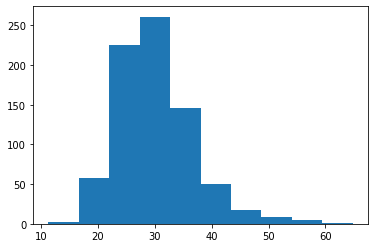

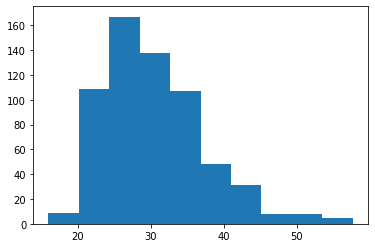

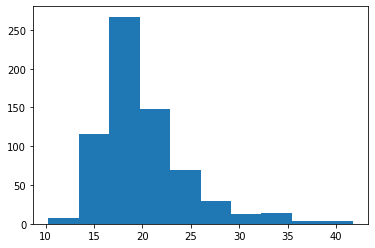

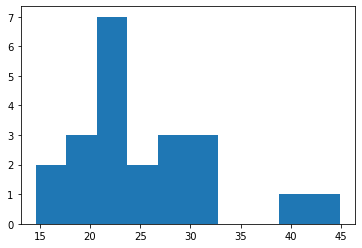

In [60]:
plt.hist(work1['bmi'])
plt.show()

plt.hist(work2['bmi'])
plt.show()

plt.hist(work3['bmi'])
plt.show()

plt.hist(work4['bmi'])
plt.show()

plt.hist(work5['bmi'])
plt.show()

In [57]:
smoking1 = stroke[stroke['smoking_status'] == 'formerly smoked']
smoking2 = stroke[stroke['smoking_status'] == 'never smoked']
smoking3 = stroke[stroke['smoking_status'] == 'smokes']
smoking4 = stroke[stroke['smoking_status'] == 'Unknown']

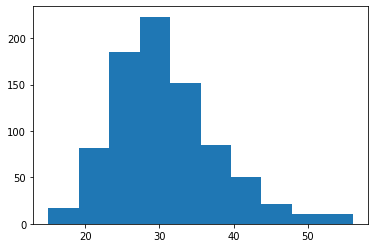

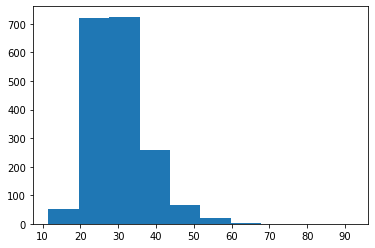

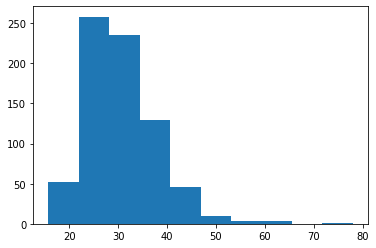

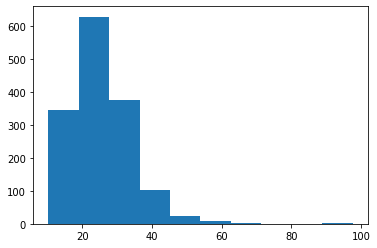

In [58]:
plt.hist(smoking1['bmi'])
plt.show()

plt.hist(smoking2['bmi'])
plt.show()

plt.hist(smoking3['bmi'])
plt.show()

plt.hist(smoking4['bmi'])
plt.show()

## Homogenity

In [126]:
stats.bartlett(stroke['bmi'][stroke['gender'] == 'Male'],
               stroke['bmi'][stroke['gender'] == 'Female'],
               stroke['bmi'][stroke['gender'] == 'Other'])

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:2242: RuntimeWarning: divide by zero encountered in true_divide
  denom = 1.0 + 1.0/(3*(k - 1)) * ((np.sum(1.0/(Ni - 1.0), axis=0)) -


BartlettResult(statistic=nan, pvalue=nan)

In [79]:
stats.bartlett(stroke['bmi'][stroke['gender'] == 'Male'],
               stroke['bmi'][stroke['gender'] == 'Female'])

BartlettResult(statistic=16.90145565034186, pvalue=3.9371378477504247e-05)

In [72]:
stats.bartlett(stroke['bmi'][stroke['work_type'] == 'Private'],
               stroke['bmi'][stroke['work_type'] == 'Self-employed'],
               stroke['bmi'][stroke['work_type'] == 'Govt_job'],
               stroke['bmi'][stroke['work_type'] == 'children'],
               stroke['bmi'][stroke['work_type'] == 'Never_worked'])

BartlettResult(statistic=238.50908281919075, pvalue=1.943176324338808e-50)

In [73]:
stats.bartlett(stroke['bmi'][stroke['smoking_status'] == 'formerly smoked'],
               stroke['bmi'][stroke['smoking_status'] == 'never smoked'],
               stroke['bmi'][stroke['smoking_status'] == 'smokes'],
               stroke['bmi'][stroke['smoking_status'] == 'Unknown'])

BartlettResult(statistic=33.058420374110476, pvalue=3.1305703573923616e-07)

# One-Way Anovas

Null Hypothesis – There is no significant difference among the groups

Alternate Hypothesis – There is a significant difference among the groups

In [81]:
model = smf.ols("bmi ~ C(gender)", data = stroke).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(gender),249.393368,2.0,2.022305,0.13246
Residual,302507.282098,4906.0,NaN,NaN


Based on the p-value from the ANOVA which is greater than 0.05, the difference between gender and bmi is not statistically significant and we are unable to reject the null hypothesis.

In [82]:
model = smf.ols("bmi ~ C(work_type)", data = stroke).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(work_type),4.0,61481.706012,15370.426503,312.409413,9.469087e-240
Residual,4904.0,241274.969453,49.199627,NaN,NaN


Based on the p-value from the ANOVA which is less than 0.05, the difference between work type and bmi is statistically significant and we are able to reject the null hypothesis.

In [83]:
model = smf.ols("bmi ~ C(smoking_status)", data = stroke).fit()
anova_table = sm.stats.anova_lm(model, typ=3)
anova_table

,sum_sq,df,F,PR(>F)
Intercept,976943.489036,1.0,17099.743206,0.000000e+00
C(smoking_status),22523.940045,3.0,131.414490,6.947847e-82
Residual,280232.735421,4905.0,NaN,NaN


Based on the p-value from the ANOVA which is less than 0.05, the difference between smoking status and bmi is statistically significant and we are able to reject the null hypothesis.

# Post-Hoc Test

Cleaning up the dataset

In [112]:
clean_stroke = stroke.filter(items=['gender', 'work_type', 'smoking_status', 'bmi']).dropna()

## Tukey One Way

In [119]:
comp = mc.MultiComparison(clean_stroke['bmi'], clean_stroke['gender'])
post_hoc_res = comp.tukeyhsd()
tukey1 = pd.DataFrame(post_hoc_res.summary())

In [120]:
print(tukey1)

        0       1         2       3         4        5       6
0  group1  group2  meandiff   p-adj     lower    upper  reject
1  Female    Male   -0.4178  0.1591   -0.9522   0.1165   False
2  Female   Other   -6.6658   0.658  -25.0784  11.7469   False
3    Male   Other   -6.2479  0.6885   -24.662  12.1661   False


Based on the tukey one way there was no significant difference in bmi between genders.

In [121]:
comp = mc.MultiComparison(clean_stroke['bmi'], clean_stroke['work_type'])
post_hoc_res = comp.tukeyhsd()
tukey2 = pd.DataFrame(post_hoc_res.summary())

In [122]:
print(tukey2)

                0              1         2       3         4        5       6
0          group1         group2  meandiff   p-adj     lower    upper  reject
1        Govt_job   Never_worked   -4.9766  0.0095    -9.128  -0.8253    True
2        Govt_job        Private   -0.2174     0.9   -1.0611   0.6263   False
3        Govt_job  Self-employed   -0.3102     0.9   -1.3369   0.7166   False
4        Govt_job       children  -10.4841   0.001  -11.5459  -9.4222    True
5    Never_worked        Private    4.7592  0.0133    0.6625   8.8558    True
6    Never_worked  Self-employed    4.6664  0.0179    0.5282   8.8047    True
7    Never_worked       children   -5.5075  0.0027   -9.6545  -1.3604    True
8         Private  Self-employed   -0.0928     0.9   -0.8693   0.6838   False
9         Private       children  -10.2666   0.001   -11.089  -9.4442    True
10  Self-employed       children  -10.1739   0.001  -11.1832  -9.1646    True


Based on the tukey one way there was a significant difference in bmi depending on work type for results 1,4-7,9,10.

In [123]:
comp = mc.MultiComparison(clean_stroke['bmi'], clean_stroke['smoking_status'])
post_hoc_res = comp.tukeyhsd()
tukey3 = pd.DataFrame(post_hoc_res.summary())

In [124]:
print(tukey3)

                 0                1         2       3        4       5       6
0           group1           group2  meandiff   p-adj    lower   upper  reject
1          Unknown  formerly smoked    5.0808   0.001   4.2411  5.9206    True
2          Unknown     never smoked    4.3162   0.001   3.6393  4.9931    True
3          Unknown           smokes    4.8772   0.001   4.0018  5.7526    True
4  formerly smoked     never smoked   -0.7646   0.072  -1.5737  0.0444   False
5  formerly smoked           smokes   -0.2036     0.9  -1.1848  0.7776   False
6     never smoked           smokes     0.561  0.3216   -0.285   1.407   False


Based on the tukey one way there was a significant difference in bmi depending on smoking status for results 1-3.